In [636]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style('dark')

## Attractions

In [637]:
attractions=pd.read_csv('./datasets/attractions.csv')
attractions

,itemId,Name,Rating,Category,Cost,Link
0,0,St. Lawrence Market,4.6,"['tourist attraction, point of interest, estab...",2.0,https://maps.google.com/?cid=14558648499821721341
1,1,CN Tower,4.6,"['tourist attraction, point of interest, estab...",NaN,https://maps.google.com/?cid=1580157384328508801
2,2,Ripley's Aquarium of Canada,4.6,"['aquarium, point of interest, establishment']",NaN,https://maps.google.com/?cid=10209407575645757757
3,3,Toronto Island Park,4.7,"['park, point of interest, establishment']",NaN,https://maps.google.com/?cid=5390851624077167659
4,4,Casa Loma,4.5,"['museum, tourist attraction, point of interes...",NaN,https://maps.google.com/?cid=7024710250092976207
5,5,Pai Northern Tai Kitchen,4.6,"['restaurant, food, point of interest, establi...",2.0,https://maps.google.com/?cid=6870643561785559914
6,6,Royal Ontario Museum,4.7,"['tourist attraction, museum, point of interes...",3.0,https://maps.google.com/?cid=14520789240037897618
7,7,The Distillery Historic District,4.6,"['tourist attraction, shopping mall, point of ...",NaN,https://maps.google.com/?cid=10241881967959162025
8,8,Little Canada,4.9,"['tourist attraction, point of interest, estab...",NaN,https://maps.google.com/?cid=17426472204490066424
9,9,Art Gallery of Ontario,4.7,"['tourist attraction, museum, point of interes...",NaN,https://maps.google.com/?cid=15719664235306829487


In [638]:
attractions.shape

(23, 6)

In [639]:
attractions.describe()

,itemId,Rating,Cost
count,23.00000,23.000000,5.000000
mean,11.00000,4.608696,2.600000
std,6.78233,0.127611,0.894427
min,0.00000,4.400000,2.000000
25%,5.50000,4.550000,2.000000
50%,11.00000,4.600000,2.000000
75%,16.50000,4.700000,3.000000
max,22.00000,4.900000,4.000000


In [640]:
attractions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   itemId    23 non-null     int64  
 1   Name      23 non-null     object 
 2   Rating    23 non-null     float64
 3   Category  23 non-null     object 
 4   Cost      5 non-null      float64
 5   Link      23 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ KB


In [641]:
attractions['Category'].unique()

array(["['tourist attraction, point of interest, establishment']",
       "['aquarium, point of interest, establishment']",
       "['park, point of interest, establishment']",
       "['museum, tourist attraction, point of interest, establishment']",
       "['restaurant, food, point of interest, establishment']",
       "['tourist attraction, museum, point of interest, establishment']",
       "['tourist attraction, shopping mall, point of interest, establishment']",
       "['zoo, tourist attraction, point of interest, establishment']",
       "['restaurant, food, bar, point of interest, establishment']",
       "['library, point of interest, establishment']",
       "['shopping mall, point of interest, establishment']",
       "['park, tourist attraction, point of interest, establishment']",
       "['point of interest, establishment']",
       "['tourist attraction, park, point of interest, establishment']"],
      dtype=object)

In [642]:
len(attractions['Category'].unique()[0])

56

In [643]:
#Getting the spot with the highest rating
highest_rating=attractions['Rating'].max()
attractions[attractions["Rating"]==highest_rating]

,itemId,Name,Rating,Category,Cost,Link
8,8,Little Canada,4.9,"['tourist attraction, point of interest, estab...",NaN,https://maps.google.com/?cid=17426472204490066424


In [644]:
#Getting the sot with the lowest rating
min_quality=attractions['Rating'].min()
attractions[attractions["Rating"]==min_quality]

,itemId,Name,Rating,Category,Cost,Link
11,11,Toronto Zoo,4.4,"['zoo, tourist attraction, point of interest, ...",NaN,https://maps.google.com/?cid=11392271285188539864
14,14,Toronto Public Library,4.4,"['library, point of interest, establishment']",NaN,https://maps.google.com/?cid=8705366740364824902
15,15,CF Toronto Eaton Centre,4.4,"['shopping mall, point of interest, establishm...",NaN,https://maps.google.com/?cid=10054590163955992631
22,22,Toronto Island Ferries,4.4,"['point of interest, establishment']",NaN,https://maps.google.com/?cid=13449258840838394464


## User Features

In [645]:
user_features=pd.read_csv('./datasets/user_features.csv', index_col=0)
user_features.head(50)

,Age,AcDeg,Budget,Accom,Gender,Job,Region,GroupComp
userId,,,,,,,,
0,1,3,1,1,Female,white collar,South Europe,2Adlt+Child
1,2,3,2,2,Male,blue collar,North Europe,2Adlt+Child
2,2,3,2,2,Male,blue collar,South America,1Adlt
3,5,3,2,2,Female,blue collar,South Europe,2Adlt+Child
4,3,1,1,2,Male,blue collar,North Europe,1Adlt
5,1,3,1,1,Female,white collar,South Europe,1Adlt
6,2,2,1,2,Female,blue collar,Africa,2Adlt
7,5,4,3,2,Male,white collar,South America,2Adlt
8,4,3,2,2,Male,blue collar,South Europe,1Adlt


In [646]:
#Get the shape of the dataset
user_features.shape

(100000, 8)

In [647]:
user_features.columns

Index(['Age', 'AcDeg', 'Budget', 'Accom', 'Gender', 'Job', 'Region',
       'GroupComp'],
      dtype='object')

In [648]:
user_features.describe()

,Age,AcDeg,Budget,Accom
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,3.083250,3.113020,1.807570,2.046990
std,1.268643,0.750421,0.622868,0.673251
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,1.000000,2.000000
50%,3.000000,3.000000,2.000000,2.000000
75%,4.000000,4.000000,2.000000,2.000000
max,5.000000,4.000000,3.000000,4.000000


In [649]:
user_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Age        100000 non-null  int64 
 1   AcDeg      100000 non-null  int64 
 2   Budget     100000 non-null  int64 
 3   Accom      100000 non-null  int64 
 4   Gender     100000 non-null  object
 5   Job        100000 non-null  object
 6   Region     100000 non-null  object
 7   GroupComp  100000 non-null  object
dtypes: int64(4), object(4)
memory usage: 6.9+ MB


In [650]:
#Check how many categories are in the age category
user_features['Age'].unique()

array([1, 2, 5, 3, 4])

The numbers represent the age ranges, which is the following:
1: 20 - 30
2: 31 - 40
3: 41 - 50
4: 51 - 60
5: 61 and above

In [651]:
user_features=user_features.drop(columns=['AcDeg', 'Accom'])
user_features.head()

,Age,Budget,Gender,Job,Region,GroupComp
userId,,,,,,
0,1,1,Female,white collar,South Europe,2Adlt+Child
1,2,2,Male,blue collar,North Europe,2Adlt+Child
2,2,2,Male,blue collar,South America,1Adlt
3,5,2,Female,blue collar,South Europe,2Adlt+Child
4,3,1,Male,blue collar,North Europe,1Adlt


In [652]:
user_features['Budget'].unique()

array([1, 2, 3])

The Budget column include 3 budget levels:
1: $5000 - $10000
2: $11000 - $20000
3: $21000+

In [653]:
user_features['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [654]:
#Getting the number of male and female tourists
print(f'There are {user_features["Gender"][user_features["Gender"]=="Male"].count()} male tourists')
print(f'There are {user_features["Gender"][user_features["Gender"]=="Female"].count()} female tourists')

There are 49976 male tourists
There are 50024 female tourists


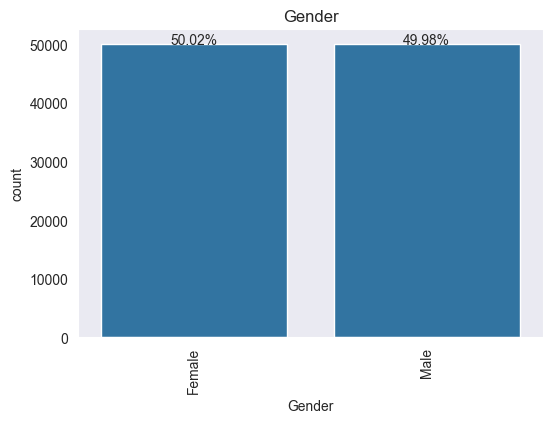

In [655]:
plt.figure(figsize=(6,4))
total=float(len(user_features['Gender']))
sen=sns.countplot(x='Gender', data=user_features)
for g in sen.patches:
    height=g.get_height()
    sen.text(g.get_x()+g.get_width()/2, height+3, '{:1.2f}%'.format((height/total)*100), ha='center')
plt.title('Gender')
plt.xlabel('Gender')
plt.xticks(rotation=90)
plt.show()

## User Ratings

In [656]:
user_ratings=pd.read_csv('./datasets/user_ratings.csv')
user_ratings.head(50)

,userId,itemId,rating
0,13,0,1.533462
1,15,0,1.283205
2,17,0,1.506836
3,19,0,1.260289
4,23,0,3.203168
5,24,0,2.645116
6,29,0,1.326969
7,44,0,4.293818
8,47,0,1.640807
9,59,0,2.807194


In [657]:
user_ratings.shape

(345368, 3)

In [658]:
new_ratings=pd.merge(user_ratings, attractions, on='itemId')
new_ratings.head()

,userId,itemId,rating,Name,Rating,Category,Cost,Link
0,13,0,1.533462,St. Lawrence Market,4.6,"['tourist attraction, point of interest, estab...",2.0,https://maps.google.com/?cid=14558648499821721341
1,15,0,1.283205,St. Lawrence Market,4.6,"['tourist attraction, point of interest, estab...",2.0,https://maps.google.com/?cid=14558648499821721341
2,17,0,1.506836,St. Lawrence Market,4.6,"['tourist attraction, point of interest, estab...",2.0,https://maps.google.com/?cid=14558648499821721341
3,19,0,1.260289,St. Lawrence Market,4.6,"['tourist attraction, point of interest, estab...",2.0,https://maps.google.com/?cid=14558648499821721341
4,23,0,3.203168,St. Lawrence Market,4.6,"['tourist attraction, point of interest, estab...",2.0,https://maps.google.com/?cid=14558648499821721341


In [659]:
new_ratings.groupby('Name')['rating'].count().sort_values(ascending=False)

Name
CN Tower                            15264
Royal Ontario Museum                15180
Toronto Public Library              15177
High Park                           15123
Dundas Square                       15112
Black + Blue                        15111
Art Gallery of Ontario              15082
Toronto Island Ferries              15072
Steam Whistle Brewery               15042
Royal Alexandra Theatre             15027
Edwards Garden                      15014
Casa Loma                           15012
Pai Northern Tai Kitchen            15008
Toronto Island Park                 14992
The Distillery Historic District    14990
Hockey Hall of Fame                 14945
St. Lawrence Market                 14945
Ripley's Aquarium of Canada         14935
CF Toronto Eaton Centre             14897
Little Canada                       14892
Toronto Zoo                         14888
Nathan Phillips Square              14857
Scarborough Bluffs                  14803
Name: rating, dtype: int64

This shows the number of ratings for each attraction inside the csv file.

In [660]:
new_ratings.groupby('Name')['rating'].mean().sort_values(ascending=False)

Name
High Park                           3.427827
Ripley's Aquarium of Canada         3.351523
Scarborough Bluffs                  3.339242
Steam Whistle Brewery               3.116446
Toronto Island Ferries              2.995566
Toronto Public Library              2.974881
Pai Northern Tai Kitchen            2.972978
Nathan Phillips Square              2.877170
Casa Loma                           2.875325
Toronto Zoo                         2.854905
CF Toronto Eaton Centre             2.718406
The Distillery Historic District    2.577721
Little Canada                       2.462013
Royal Ontario Museum                2.314689
St. Lawrence Market                 2.222544
Hockey Hall of Fame                 2.141511
Black + Blue                        1.944467
Art Gallery of Ontario              1.933442
Royal Alexandra Theatre             1.792523
Edwards Garden                      1.730683
Dundas Square                       1.659638
Toronto Island Park                 1.621705
CN To

Here shows the mean rating of each attraction.

In [661]:
users_ratings=user_ratings.pivot_table(index='userId', columns='itemId', values='rating')
users_ratings.head(20)

itemId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
userId,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,1.500420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.667926,2.828157,NaN,NaN,NaN,1.632696,NaN
1,NaN,NaN,NaN,NaN,NaN,4.156108,NaN,1.845351,NaN,3.968529,NaN,NaN,NaN,4.705281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2.709697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.341966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.596720,NaN,2.658896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.661253
4,NaN,NaN,1.373965,NaN,NaN,4.714443,1.636043,NaN,NaN,NaN,1.531573,NaN,NaN,NaN,NaN,NaN,2.277358,NaN,NaN,NaN,3.804309,1.182217,NaN
5,NaN,NaN,NaN,1.188851,NaN,1.323312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.195162,NaN,NaN
6,NaN,NaN,NaN,1.596352,NaN,NaN,NaN,NaN,1.701678,NaN,1.568016,NaN,NaN,NaN,NaN,NaN,2.852247,NaN,NaN,NaN,NaN,1.544382,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.982568,NaN,NaN,NaN,NaN,NaN,2.992974,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.794025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are quite a lot of missing values not all users will rate all destinations

## The Recommendation System

The recommendation system will include:
- Content-based filtering recommender system
- Collaborative filtering recommender system
- Hybrid recommender system that combines the two 

Collaborative filtering will be applied to the user-rating table, while the content-based filtering will be applied to both the attractions and user features table.

### Collaborative Filtering

In [662]:
#First we handle the NANs present in the table, to do this we could either fill with zero or use some feature scaling technique
#like standardization or normalization, we will be filling with zero.

users_ratings=users_ratings.fillna(0)
users_ratings.head()

itemId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
userId,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.50042,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,2.667926,2.828157,0.0,0.0,0.000000,1.632696,0.000000
1,0.0,0.00000,0.000000,0.0,0.0,4.156108,0.000000,1.845351,0.0,3.968529,0.000000,0.00000,0.0,4.705281,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.00000,2.709697,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.341966,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.59672,0.0,2.658896,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.661253
4,0.0,0.00000,1.373965,0.0,0.0,4.714443,1.636043,0.000000,0.0,0.000000,1.531573,0.00000,0.0,0.000000,0.0,0.0,2.277358,0.000000,0.0,0.0,3.804309,1.182217,0.000000


In [663]:
#Create a numpy array of the users_ratings
user_item_matrix=np.array(users_ratings)
user_item_matrix

array([[0.        , 1.50042029, 0.        , ..., 0.        , 1.63269589,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 2.70969684, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.89870291]])

In [664]:
# Perform matrix factorization using SVD
def matrix_factorization(R, K=2, steps=10, alpha=0.01, beta=0.02):
    # R: user-item matrix
    # K: number of latent features
    # steps: number of iterations
    # alpha: learning rate
    # beta: regularization parameter
    
    N, M = R.shape
    P = np.random.rand(N, K)
    Q = np.random.rand(M, K)
    # N by M= N by K multiplied by k by M
    
    for step in range(steps):
        for i in range(N):
            for j in range(M):
                if R[i, j] > 0:
                    eij = R[i, j] - np.dot(P[i, :], Q[j, :])
                    for k in range(K):
                        P[i, k] += alpha * (2 * eij * Q[j, k] - beta * P[i, k])
                        Q[j, k] += alpha * (2 * eij * P[i, k] - beta * Q[j, k])
        
        # Calculate RMSE
        rmse = 0
        for i in range(N):
            for j in range(M):
                if R[i, j] > 0:
                    rmse += (R[i, j] - np.dot(P[i, :], Q[j, :])) ** 2
                    for k in range(K):
                        rmse += (beta / 2) * (P[i, k] ** 2 + Q[j, k] ** 2)
        rmse = np.sqrt(rmse / (N * M))
        if step % 1000 == 0:
            print("Step:", step, "RMSE:", rmse)
    
    return P, Q

In [665]:
# Perform matrix factorization
latent_features = 3
P, Q = matrix_factorization(user_item_matrix, K=latent_features)

Step: 0 RMSE: 0.33221371983215486


In [666]:
# Calculate predicted ratings
predicted_collaborative_ratings = np.dot(P, Q.T)

In [667]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(user_item_matrix[user_item_matrix > 0], predicted_collaborative_ratings[user_item_matrix > 0]))
print("Final RMSE:", rmse)
print(predicted_collaborative_ratings)

Final RMSE: 0.6163830299803336
[[1.80394796 1.30336517 2.58527412 ... 1.52253305 1.42469951 2.48288442]
 [3.03086755 2.19353851 4.76988897 ... 2.33472806 2.24525794 4.10052751]
 [1.61989255 1.13317237 2.44574964 ... 1.21133929 1.22499941 2.10340779]
 ...
 [1.6735519  1.17740328 2.55384879 ... 1.25258329 1.25801672 2.18635316]
 [1.38064264 0.99931043 2.21247757 ... 1.04215671 1.0088936  1.86059881]
 [1.98574661 1.47016161 3.02247502 ... 1.66378038 1.51657904 2.79702466]]


In [668]:
predicted_collaborative_ratings.shape

(97605, 23)

### Content-Based Filtering

In [669]:
user_features.head(30)

,Age,Budget,Gender,Job,Region,GroupComp
userId,,,,,,
0,1,1,Female,white collar,South Europe,2Adlt+Child
1,2,2,Male,blue collar,North Europe,2Adlt+Child
2,2,2,Male,blue collar,South America,1Adlt
3,5,2,Female,blue collar,South Europe,2Adlt+Child
4,3,1,Male,blue collar,North Europe,1Adlt
5,1,1,Female,white collar,South Europe,1Adlt
6,2,1,Female,blue collar,Africa,2Adlt
7,5,3,Male,white collar,South America,2Adlt
8,4,2,Male,blue collar,South Europe,1Adlt


In [670]:
user_features.iloc[27,:]

Age                      3
Budget                   3
Gender                Male
Job           white collar
Region       North America
GroupComp       GrpFriends
Name: 27, dtype: object

In [671]:
#Label encode user features 
lb=LabelEncoder()
users_features=user_features.apply(LabelEncoder().fit_transform)
users_features.head()

,Age,Budget,Gender,Job,Region,GroupComp
userId,,,,,,
0,0,0,0,1,7,2
1,1,1,1,0,5,2
2,1,1,1,0,6,0
3,4,1,0,0,7,2
4,2,0,1,0,5,0


In [672]:
#Remember our attractions
attractions

,itemId,Name,Rating,Category,Cost,Link
0,0,St. Lawrence Market,4.6,"['tourist attraction, point of interest, estab...",2.0,https://maps.google.com/?cid=14558648499821721341
1,1,CN Tower,4.6,"['tourist attraction, point of interest, estab...",NaN,https://maps.google.com/?cid=1580157384328508801
2,2,Ripley's Aquarium of Canada,4.6,"['aquarium, point of interest, establishment']",NaN,https://maps.google.com/?cid=10209407575645757757
3,3,Toronto Island Park,4.7,"['park, point of interest, establishment']",NaN,https://maps.google.com/?cid=5390851624077167659
4,4,Casa Loma,4.5,"['museum, tourist attraction, point of interes...",NaN,https://maps.google.com/?cid=7024710250092976207
5,5,Pai Northern Tai Kitchen,4.6,"['restaurant, food, point of interest, establi...",2.0,https://maps.google.com/?cid=6870643561785559914
6,6,Royal Ontario Museum,4.7,"['tourist attraction, museum, point of interes...",3.0,https://maps.google.com/?cid=14520789240037897618
7,7,The Distillery Historic District,4.6,"['tourist attraction, shopping mall, point of ...",NaN,https://maps.google.com/?cid=10241881967959162025
8,8,Little Canada,4.9,"['tourist attraction, point of interest, estab...",NaN,https://maps.google.com/?cid=17426472204490066424
9,9,Art Gallery of Ontario,4.7,"['tourist attraction, museum, point of interes...",NaN,https://maps.google.com/?cid=15719664235306829487


In [673]:
#Generate columns for the category column
attractions['tourist attraction']=attractions['Category'].apply(lambda x: 1 if 'tourist attraction' in x else 0)
attractions['point of interest']=attractions['Category'].apply(lambda x: 1 if 'point of interest' in x else 0)
attractions['establishment']=attractions['Category'].apply(lambda x: 1 if 'establishment' in x else 0)
attractions['aquarium']=attractions['Category'].apply(lambda x: 1 if 'aquarium' in x else 0)
attractions['park']=attractions['Category'].apply(lambda x: 1 if 'park' in x else 0)
attractions['museum']=attractions['Category'].apply(lambda x: 1 if 'museum' in x else 0)
attractions['restaurant']=attractions['Category'].apply(lambda x: 1 if 'restaurant' in x else 0)
attractions['food']=attractions['Category'].apply(lambda x: 1 if 'food' in x else 0)
attractions['shopping mall']=attractions['Category'].apply(lambda x: 1 if 'shopping mall' in x else 0)
attractions['zoo']=attractions['Category'].apply(lambda x: 1 if 'zoo' in x else 0)
attractions['bar']=attractions['Category'].apply(lambda x: 1 if 'bar' in x else 0)
attractions['library']=attractions['Category'].apply(lambda x: 1 if 'library' in x else 0)
attractions['neighborhood']=attractions['Category'].apply(lambda x: 1 if 'neighborhood' in x else 0)
attractions['political']=attractions['Category'].apply(lambda x: 1 if 'political' in x else 0)

In [674]:
#Visualize results
attractions.head()

,itemId,Name,Rating,Category,Cost,Link,tourist attraction,point of interest,establishment,aquarium,park,museum,restaurant,food,shopping mall,zoo,bar,library,neighborhood,political
0,0,St. Lawrence Market,4.6,"['tourist attraction, point of interest, estab...",2.0,https://maps.google.com/?cid=14558648499821721341,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,CN Tower,4.6,"['tourist attraction, point of interest, estab...",NaN,https://maps.google.com/?cid=1580157384328508801,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,2,Ripley's Aquarium of Canada,4.6,"['aquarium, point of interest, establishment']",NaN,https://maps.google.com/?cid=10209407575645757757,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,3,Toronto Island Park,4.7,"['park, point of interest, establishment']",NaN,https://maps.google.com/?cid=5390851624077167659,0,1,1,0,1,0,0,0,0,0,0,0,0,0
4,4,Casa Loma,4.5,"['museum, tourist attraction, point of interes...",NaN,https://maps.google.com/?cid=7024710250092976207,1,1,1,0,0,1,0,0,0,0,0,0,0,0


In [675]:
#Drop columns not needed for content based filtering
dest_spots=attractions.drop(columns=['Name','Category','Cost','Link'])
dest_spots.head()

,itemId,Rating,tourist attraction,point of interest,establishment,aquarium,park,museum,restaurant,food,shopping mall,zoo,bar,library,neighborhood,political
0,0,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,2,4.6,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,3,4.7,0,1,1,0,1,0,0,0,0,0,0,0,0,0
4,4,4.5,1,1,1,0,0,1,0,0,0,0,0,0,0,0


In [676]:
user_ratings.head()

,userId,itemId,rating
0,13,0,1.533462
1,15,0,1.283205
2,17,0,1.506836
3,19,0,1.260289
4,23,0,3.203168


In [677]:
#Joining the user_ratings dataset with the attractions dataset
df=user_ratings.merge(dest_spots, on="itemId")

In [678]:
df.head(20)

,userId,itemId,rating,Rating,tourist attraction,point of interest,establishment,aquarium,park,museum,restaurant,food,shopping mall,zoo,bar,library,neighborhood,political
0,13,0,1.533462,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,15,0,1.283205,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,17,0,1.506836,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,19,0,1.260289,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,23,0,3.203168,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0
5,24,0,2.645116,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0
6,29,0,1.326969,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0
7,44,0,4.293818,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0
8,47,0,1.640807,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0
9,59,0,2.807194,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [679]:
#Next we join this dataset with the user features dataset
final_df=df.merge(users_features, on="userId")
final_df.head()

,userId,itemId,rating,Rating,tourist attraction,point of interest,establishment,aquarium,park,museum,restaurant,food,shopping mall,zoo,bar,library,neighborhood,political,Age,Budget,Gender,Job,Region,GroupComp
0,13,0,1.533462,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,5,0
1,15,0,1.283205,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,1,1,0,7,1
2,17,0,1.506836,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,2,0
3,19,0,1.260289,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
4,23,0,3.203168,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0


In [680]:
#Set ratings to y variable
y=final_df.iloc[:, 2].values
y

array([1.53346216, 1.28320537, 1.5068359 , ..., 3.32809343, 2.86493922,
       2.89870291])

In [681]:
#Drop ratings column
final_df=final_df.drop(columns="rating")
final_df.head()

,userId,itemId,Rating,tourist attraction,point of interest,establishment,aquarium,park,museum,restaurant,food,shopping mall,zoo,bar,library,neighborhood,political,Age,Budget,Gender,Job,Region,GroupComp
0,13,0,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,5,0
1,15,0,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,1,1,0,7,1
2,17,0,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,2,0
3,19,0,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1
4,23,0,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0


In [682]:
X=final_df.iloc[:,:].values
X

array([[1.3000e+01, 0.0000e+00, 4.6000e+00, ..., 0.0000e+00, 5.0000e+00,
        0.0000e+00],
       [1.5000e+01, 0.0000e+00, 4.6000e+00, ..., 0.0000e+00, 7.0000e+00,
        1.0000e+00],
       [1.7000e+01, 0.0000e+00, 4.6000e+00, ..., 0.0000e+00, 2.0000e+00,
        0.0000e+00],
       ...,
       [9.9988e+04, 2.2000e+01, 4.4000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [9.9992e+04, 2.2000e+01, 4.4000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [9.9999e+04, 2.2000e+01, 4.4000e+00, ..., 1.0000e+00, 7.0000e+00,
        2.0000e+00]])

In [683]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [684]:
X_train

array([[9.1867e+04, 2.0000e+00, 4.6000e+00, ..., 0.0000e+00, 5.0000e+00,
        0.0000e+00],
       [2.1205e+04, 1.7000e+01, 4.7000e+00, ..., 1.0000e+00, 5.0000e+00,
        2.0000e+00],
       [2.6463e+04, 6.0000e+00, 4.7000e+00, ..., 0.0000e+00, 6.0000e+00,
        0.0000e+00],
       ...,
       [7.8367e+04, 8.0000e+00, 4.9000e+00, ..., 1.0000e+00, 5.0000e+00,
        0.0000e+00],
       [7.6983e+04, 9.0000e+00, 4.7000e+00, ..., 1.0000e+00, 7.0000e+00,
        0.0000e+00],
       [1.1248e+04, 8.0000e+00, 4.9000e+00, ..., 1.0000e+00, 5.0000e+00,
        0.0000e+00]])

In [685]:
y_train

array([4.66224022, 3.81533999, 2.34583418, ..., 1.18605406, 2.3353743 ,
       4.22495215])

In [686]:
#Build gbr model
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [687]:
model_importance=model.feature_importances_

In [688]:
lis_features=[]
lis_importance=[]
for feature, importance in zip(final_df.columns, model_importance):
    lis_features.append(feature)
    lis_importance.append(importance)

lis_importance

[np.float64(0.0),
 np.float64(0.6339767221219992),
 np.float64(0.11020227038581608),
 np.float64(0.00946536389910663),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0498705853914853),
 np.float64(0.009764156321837594),
 np.float64(0.000392799568714182),
 np.float64(0.003761088459029491),
 np.float64(0.0025947368980897226),
 np.float64(0.007185704263317661),
 np.float64(0.0),
 np.float64(0.0003382878742916753),
 np.float64(0.027938495667209604),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0063201649816455934),
 np.float64(0.0011991121330021022),
 np.float64(0.0028730109011218426),
 np.float64(0.08872159889415437),
 np.float64(0.03564132939417651),
 np.float64(0.009754572845002515)]

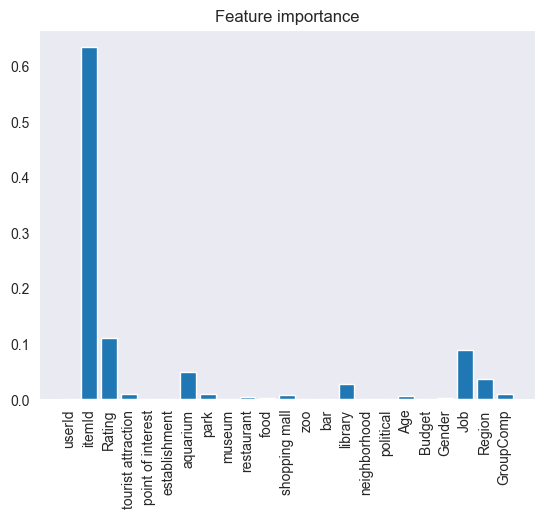

In [689]:
X=np.array(lis_features)
y=np.array(lis_importance)
plt.bar(X,y)
plt.title('Feature importance')
plt.xticks(rotation=90);

In [690]:
#Get predictions
preds = model.predict(X_test)
rmse = np.sqrt(np.mean((preds- y_test)**2))
print(f'content-based rmse = {rmse}')

content-based rmse = 0.7336691708020745


In [691]:
# Drop non-numeric columns before making predictions
X_numeric = final_df.select_dtypes(include=[np.number])

# Make predictions on entire dataset
predicted_ratings = model.predict(X_numeric)
predicted_ratings

c:\Users\ernes\Desktop\University\W2025\COE70B\Tourism_Recommendation_System\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


array([2.17419579, 2.12477973, 2.07385058, ..., 2.62999101, 2.90634807,
       3.02477751])

In [692]:
#Generate new predicted ratings column
final_df['new_ratings']=predicted_ratings
final_df.head()

,userId,itemId,Rating,tourist attraction,point of interest,establishment,aquarium,park,museum,restaurant,food,shopping mall,zoo,bar,library,neighborhood,political,Age,Budget,Gender,Job,Region,GroupComp,new_ratings
0,13,0,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,5,0,2.174196
1,15,0,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,1,1,0,7,1,2.124780
2,17,0,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,2,0,2.073851
3,19,0,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1.937419
4,23,0,4.6,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,2.284629


In [693]:
content_filter_df=final_df.pivot_table(index="userId", columns="itemId", values='new_ratings')
content_filter_df.head(20)

itemId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
userId,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,1.707244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.236883,3.400596,NaN,NaN,NaN,1.859586,NaN
1,NaN,NaN,NaN,NaN,NaN,3.199470,NaN,2.017521,NaN,2.090916,NaN,NaN,NaN,3.302445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2.772026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.135749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.764350,NaN,3.180659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.245375
4,NaN,NaN,2.896121,NaN,NaN,3.245788,2.301971,NaN,NaN,NaN,2.165411,NaN,NaN,NaN,NaN,NaN,3.442782,NaN,NaN,NaN,2.046937,1.853978,NaN
5,NaN,NaN,NaN,1.652451,NaN,2.919410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.787998,NaN,NaN
6,NaN,NaN,NaN,1.651192,NaN,NaN,NaN,NaN,2.080640,NaN,1.922957,NaN,NaN,NaN,NaN,NaN,3.133427,NaN,NaN,NaN,NaN,1.737528,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.994066,NaN,NaN,NaN,NaN,NaN,1.723230,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.593712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [694]:
#Fill NaNs with zero
content_filter_df=content_filter_df.fillna(0)
content_filter_df.head()

itemId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
userId,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.707244,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,3.236883,3.400596,0.0,0.0,0.000000,1.859586,0.000000
1,0.0,0.000000,0.000000,0.0,0.0,3.199470,0.000000,2.017521,0.0,2.090916,0.000000,0.00000,0.0,3.302445,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.000000,2.772026,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,2.135749,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.76435,0.0,3.180659,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,3.245375
4,0.0,0.000000,2.896121,0.0,0.0,3.245788,2.301971,0.000000,0.0,0.000000,2.165411,0.00000,0.0,0.000000,0.0,0.0,3.442782,0.000000,0.0,0.0,2.046937,1.853978,0.000000


In [695]:
users_ratings.head()

itemId,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
userId,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,1.50042,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.0,2.667926,2.828157,0.0,0.0,0.000000,1.632696,0.000000
1,0.0,0.00000,0.000000,0.0,0.0,4.156108,0.000000,1.845351,0.0,3.968529,0.000000,0.00000,0.0,4.705281,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.00000,2.709697,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,1.341966,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2.59672,0.0,2.658896,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,2.661253
4,0.0,0.00000,1.373965,0.0,0.0,4.714443,1.636043,0.000000,0.0,0.000000,1.531573,0.00000,0.0,0.000000,0.0,0.0,2.277358,0.000000,0.0,0.0,3.804309,1.182217,0.000000


In [696]:
#Create an array for content based filtering 
content_based_array=np.array(content_filter_df)
content_based_array.shape

(97605, 23)

In [697]:
#Weighted hybrid model
chart_val=[]
w=np.linspace(0,1,21)
for i in w:
  final_pred=predicted_collaborative_ratings[user_item_matrix>0]*i + (content_based_array[user_item_matrix>0]*(1-i))
  rmse=np.sqrt(np.mean(np.square(final_pred-user_item_matrix[user_item_matrix>0])))
  chart_val.append([i,rmse])
  
chart_val

[[np.float64(0.0), np.float64(0.7327811758339597)],
 [np.float64(0.05), np.float64(0.7185214456640607)],
 [np.float64(0.1), np.float64(0.7049324769562977)],
 [np.float64(0.15000000000000002), np.float64(0.6920537834751787)],
 [np.float64(0.2), np.float64(0.679925727078242)],
 [np.float64(0.25), np.float64(0.6685891581752139)],
 [np.float64(0.30000000000000004), np.float64(0.6580849819605404)],
 [np.float64(0.35000000000000003), np.float64(0.6484536510041152)],
 [np.float64(0.4), np.float64(0.6397345890954524)],
 [np.float64(0.45), np.float64(0.631965556368135)],
 [np.float64(0.5), np.float64(0.6251819713909256)],
 [np.float64(0.55), np.float64(0.6194162116338255)],
 [np.float64(0.6000000000000001), np.float64(0.614696918882269)],
 [np.float64(0.65), np.float64(0.611048340066404)],
 [np.float64(0.7000000000000001), np.float64(0.6084897358858727)],
 [np.float64(0.75), np.float64(0.6070348889685083)],
 [np.float64(0.8), np.float64(0.6066917397967091)],
 [np.float64(0.8500000000000001), np

Text(0, 0.5, 'RMSE')

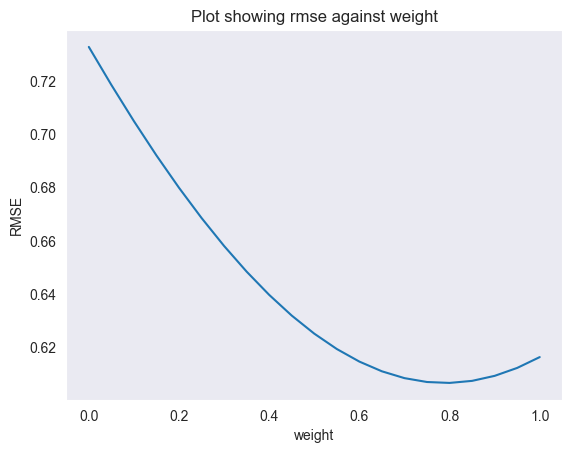

In [698]:
chart_val_np = np.array(chart_val)
plt.plot(chart_val_np[:, 0], chart_val_np[:,1])
plt.title('Plot showing rmse against weight')
plt.xlabel('weight')
plt.ylabel('RMSE')

## Finally, using the model

To use the model:
* User will provide ratings for some locations
* Generate ratings for othe rlocations using GBR model
* Use collaborative filtering on chosen locations to generate ratings
* Combine using hybrid
* Aggregate for group

We assume the user provides data such as:
* Age: 25
* Budget: $15000
* Gender: Female
* Job: White Collar
* Region: South Europe
* GroupComp: 2Adlts

Rates 4 attractions
* St. Lawrence Market:4.2
* Little Canada:4.8
* Black + Blue:4.3
* Toronto Island Ferries:3.9

In [699]:
#Get activities user did not rate
def get_restaurants_not_rated(restaurants):
  list_restaurants_to_predict=[]
  for i in attractions['Name'].unique():
    if i not in restaurants:
        list_restaurants_to_predict.append(i)
  return list_restaurants_to_predict

In [700]:
def generate_user_matrix(userId, age, budget, gender, job, region, groupcomp):
    user_df=pd.DataFrame({'userId':userId, 'Age':[age], 'Budget':[budget], 'Gender':[gender], 'Job':[job], 'Region':[region], 'GroupComp':[groupcomp]})
    return user_df

In [701]:
#Get activity details for activities not rated by user
def get_activity_details(restaurants,userId, age, budget, gender, job, region, groupcomp):
    restaurants_to_predict=get_restaurants_not_rated(restaurants=restaurants)
    activity_df=attractions[attractions['Name'].isin(restaurants_to_predict)].reset_index()
    activity_df=activity_df.drop(columns=['Name', 'Category'])
    user_df=generate_user_matrix(userId, age, budget, gender, job, region, groupcomp)
    new_user_df=pd.concat([user_df]*len(activity_df), ignore_index=True)
    concat_user_activity=pd.concat([new_user_df,activity_df], axis=1)
    new_order=['userId', 'itemId', 'Rating', 'tourist attraction', 'point of interest', 'establishment', 'aquarium', 'park', 'museum', 'restaurant', 'food', 'shopping mall', 'zoo', 'bar', 'library', 'neighborhood','political', 'Age', 'Budget', 'Gender', 'Job', 'Region', 'GroupComp']
    final_df=concat_user_activity[new_order]
    return final_df

In [702]:
def predict_content_ratings(user_df):
    user_inputs=user_df.iloc[:,:].values
    pred_ratings=model.predict(user_inputs)
    user_df['predicted_ratings']=pred_ratings
    user_df=user_df.pivot_table(index="userId", columns="itemId", values="predicted_ratings")
    user_array=np.array(user_df)
    return user_array

## Matrix Factorization

In [703]:
def build_user_ratings(user_ratings):
    user_ratings_array=[0]*attractions.shape[0]
    restaurant_names=user_ratings.keys()
    for i in range(attractions.shape[0]):
        for j in restaurant_names:
            dest_id=attractions['itemId'][attractions['Name']==j]
            if int(dest_id)==i:
                user_ratings_array[i]=user_ratings[j]
    return user_ratings_array

In [704]:
def user_matrix_factorization(user_ratings):
    # Assume you have the user's ratings and the list of recommended item indices
    new_user_ratings=np.array(build_user_ratings(user_ratings))
   


    # Update the user matrix with the new user's ratings
    user_matrix = np.vstack([user_item_matrix, new_user_ratings])
    latent_features = 3
    P, Q = matrix_factorization(user_matrix, K=latent_features)

    # Generate recommendations for the new user
    predicted_user_ratings = np.dot(P[-1], Q.T)
    dest_spots=attractions['Name'].unique()

    
    # # Exclude rated items from the list of recommended items

    ratings=np.argsort(predicted_user_ratings)[::-1]

    return  predicted_user_ratings[new_user_ratings==0]

In [705]:
def hybrid_filter(restaurants, userId, age, budget, gender, job, region, groupcomp):
    restaurants_rated=restaurants.keys()
    list_restaurants_not_rated=get_restaurants_not_rated(restaurants_rated)
    user_df=get_activity_details(restaurants_rated,userId, age, budget, gender, job, region, groupcomp)
    user_content_array=predict_content_ratings(user_df)
    user_collab_array=user_matrix_factorization(restaurants)
    final_pred=user_collab_array*0.75 + user_content_array* 0.25
    best_eight_activities=np.argsort(final_pred[0])[::-1][:8]
    recommended_items=[list_restaurants_not_rated[i] for i in best_eight_activities]
    return recommended_items

In [706]:
user1_pred=hybrid_filter({'CN Tower':4.0, 'Scarborough Bluffs':2.2, 'CF Toronto Eaton Centre':1.5, 'Nathan Phillips Square': 3.2}, 198673210, 0,2,1,0,5,3)
user2_pred=hybrid_filter({'The Distillery Historic District':5.0, 'St. Lawrence Market':2.5, 'Casa Loma':1.3}, 198673255, 0,2,0,1,4,3)
user3_pred=hybrid_filter({'Little Canada':3.7, 'Black + Blue':4.0, 'Pai Northern Tai Kitchen':4.5}, 198679075, 1,2,0,0,7,3)

print(user1_pred)
print(user2_pred) 
print(user3_pred)

C:\Users\ernes\AppData\Local\Temp\ipykernel_29884\4255521949.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(dest_id)==i:


Step: 0 RMSE: 0.3348365699443941


C:\Users\ernes\AppData\Local\Temp\ipykernel_29884\4255521949.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(dest_id)==i:


Step: 0 RMSE: 0.33348046488195543


C:\Users\ernes\AppData\Local\Temp\ipykernel_29884\4255521949.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(dest_id)==i:


Step: 0 RMSE: 0.3329243538312357
['High Park', "Ripley's Aquarium of Canada", 'Steam Whistle Brewery', 'Pai Northern Tai Kitchen', 'Toronto Island Ferries', 'Toronto Public Library', 'Casa Loma', 'Toronto Zoo']
["Ripley's Aquarium of Canada", 'High Park', 'Scarborough Bluffs', 'Toronto Public Library', 'Steam Whistle Brewery', 'Toronto Island Ferries', 'Toronto Zoo', 'Nathan Phillips Square']
["Ripley's Aquarium of Canada", 'High Park', 'Scarborough Bluffs', 'Steam Whistle Brewery', 'Toronto Public Library', 'Toronto Island Ferries', 'Nathan Phillips Square', 'Casa Loma']


In [707]:
lis=[]
for i,j,k in zip(user1_pred, user2_pred, user3_pred):
    if i in user2_pred and i in user3_pred:
        lis.append(i)
    if j in user1_pred and j in user3_pred:
        lis.append(j)
    if k in user1_pred and k in user1_pred:
        lis.append(k)

print(set(lis))

{'Toronto Public Library', 'Casa Loma', 'Steam Whistle Brewery', 'High Park', 'Toronto Island Ferries', "Ripley's Aquarium of Canada"}
